In [15]:
import array
import numpy as np
import struct
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.signal as spsig

# Чтение файла с выхода ЦФДН

In [16]:
from ctypes import *

In [17]:
URRtext = ['не используется',
           'номер режима работы 1, 2 (1 - адаптация, 2 - ЗНК)',
           'вид работы 1-3 (1 - ПРК, 2 - АГФУ, 3 - обнаружение)',
           'Признаки',
           'Не используется',
           'Длительность вида работы, с',
           'Не используется',
           'Номер ЗОК',
           'Номер маски запрещенных частот 1-4',
           'Номер рабочего ПЭП 1-4',
           'Границы общего диапазона частот адаптации',
           ' ',
           'Границы текущего диапазона частот адаптации, кГц',
           ' ',
           'Упреждающие границы текущего диапазона частот адаптации, кГц 5000-30000',
           ' ',
           'Рабочая частота, кГц',
           'Количество рабочих частот в режиме адаптации 1- 20',
           'Признак излучения импульса 0, 1',
           'Азимут излучения, град -8, 0, 8',
           'Длительность периода повторения, мс 20, 25, 50, 100',
           'Длительность импульса, [0.1 * мс]',
           'Девиация частоты, кГц 5, 10',
           'Границы зоны по азимуту, град -30-30 (дискрет = 0.1)',
           ' ',
           'Границы зоны по дальности, км 0-3000',
           ' ',
           'Границы диапазона рабочих частот, кГц',
           ' ',
           'Упреждающие границы зоны по азимуту, град -30-30 (дискрет = 0.1)',
           ' ',
           'Упреждающие границы зоны по дальности, км 0 - 3000',
           ' ',
           'Упреждающие границы диапазона рабочих частот, кГц 5000-30000',
           ' ',
           'Сдвиг диапазона анализа по задержке, мкс',
           'Номер начального канала дальности 1-400',
           'Число каналов дальности',
           'Расстояние между каналами дальности, мкс',
           'Число тактов когерентного накопления 64, 128, 256, 512, 1024',
           'Степень перекрытия тактов некогерентного накопления 0, 25, 50',
           'Число тактов некогерентного накопления 1, 2, 3',
           'Число каналов ускорения 0, 2',
           'Сдвиг диапазона анализа по частоте, Гц 0-100',
           'Вид амплитудной модуляции',
           'Наклон девиации ЛЧМ ',
           'Азимутальная девиация в зоне',
           'Коэффициенты искажения трассы',
           ' ',
           'Число азимутальных каналов',
           'Не используется']

In [18]:
class URR(Structure):
    _fields_ = [('reserve1', c_int * 7), # не используется
                ('NR', c_int), # номер режима работы 1, 2 (1 - адаптация, 2 - ЗНК)
                ('VR', c_int), # вид работы 1-3 (1 - ПРК, 2 - АГФУ, 3 - обнаружение)
                ('Tags', c_uint, 16), # Признаки 
                ('reserve', c_uint, 16), # Не используется
                ('Tvr', c_int), # Длительность вида работы, с
                ('kims', c_int), # Не используется 
                ('Zok', c_int), # Номер ЗОК
                ('Nmzf', c_int), # Номер маски запрещенных частот 1-4
                ('Npep', c_int), # Номер рабочего ПЭП 1-4
                ('FNa', c_int), # Границы общего диапазона частот адаптации
                ('FKa', c_int), # 
                ('FNat', c_int), # Границы текущего диапазона частот адаптации, кГц
                ('FKat', c_int), # 
                ('FNaty', c_int), # Упреждающие границы текущего диапазона частот адаптации, кГц 5000-30000
                ('FKaty', c_int), # 
                ('Fr', c_int), # Рабочая частота, кГц
                ('Kfr', c_int), # Количество рабочих частот в режиме адаптации 1- 20
                ('PrI', c_int), # Признак излучения импульса 0, 1
                ('Bprd', c_int), # Азимут излучения, град -8, 0, 8
                ('Tp', c_int), # Длительность периода повторения, мс 20, 25, 50, 100
                ('Ti', c_int), # Длительность импульса, [0.1 * мс]
                ('Fd', c_int), # Девиация частоты, кГц 5, 10
                ('Bmin', c_int), # Границы зоны по азимуту, град -30-30 (дискрет = 0.1)
                ('Bmax', c_int), # 
                ('Dmin', c_int), # Границы зоны по дальности, км 0-3000
                ('Dmax', c_int), # 
                ('FNd', c_int), # Границы диапазона рабочих частот, кГц
                ('FKd', c_int), # 
                ('Bny', c_int), # Упреждающие границы зоны по азимуту, град -30-30 (дискрет = 0.1)
                ('Bky', c_int), # 
                ('Rny', c_int), # Упреждающие границы зоны по дальности, км 0 - 3000
                ('Rky', c_int), #
                ('FNdy', c_int), # Упреждающие границы диапазона рабочих частот, кГц 5000-30000
                ('FKdy', c_int), # 
                ('SDt', c_int), # Сдвиг диапазона анализа по задержке, мкс
                ('Nnkd', c_int), # Номер начального канала дальности 1-400
                ('Nkd', c_int), # Число каналов дальности
                ('dT', c_int), # Расстояние между каналами дальности, мкс
                ('Nkn', c_int), # Число тактов когерентного накопления 64, 128, 256, 512, 1024
                ('SP', c_int), # Степень перекрытия тактов некогерентного накопления 0, 25, 50
                ('Nnn', c_int), # Число тактов некогерентного накопления 1, 2, 3
                ('Nku', c_int), # Число каналов ускорения 0, 2
                ('SDf', c_int), # Сдвиг диапазона анализа по частоте, Гц 0-100
                ('AM', c_int), # Вид амплитудной модуляции
                ('ND', c_int), # Наклон девиации ЛЧМ 
                ('dBz', c_float), # Азимутальная девиация в зоне
                ('Kt', c_float * 3), # Коэффициенты искажения трассы
                ('Ugm', c_float * 3 *2), 
                ('Naz', c_int), # Число азимутальных каналов
                ('reserve2', c_int * 59)] # Не используется

In [19]:
URR

__main__.URR

In [20]:
class TInfoPOInp(Structure):
    _fields_ = [('CW1', c_long), # Контрольное слово 1
                ('CW2', c_long), # Контрольное слово 2
                ('Time', c_long), # Время выдачи массива, в секундах, 1 Января 1970
                ('Reserve1', c_long), # 1 - воспроизведенеие, 0 - работав комплексе 
                ('Reserve2', c_long), # Не используется
                ('Type', c_long), # Тип массива
                ('Length', c_long), # Длина массива (с шапкой) в байтах
                ('urr', URR), # УРР
                ('time', c_uint), # Время 
                ('ms', c_uint), # Миллисекунды времени массива
                ('azimuths', c_float * 11), # Биссектрисы азимутов (град)
                ('buffer', c_float * 256 * 11 * 42 * 2)]

In [21]:
class TKN(Structure):
    _fields_ = [('empty', c_int * 13),
                ('PO1', TInfoPOInp),
                ('PO2', TInfoPOInp),
                ('PO3', TInfoPOInp),
                ('PO4', TInfoPOInp),
                ('PO5', TInfoPOInp),
                ('PO6', TInfoPOInp),
                ('PO7', TInfoPOInp),
                ('PO8', TInfoPOInp),
                ('PO9', TInfoPOInp),
                ('PO10', TInfoPOInp),
                ('PO11', TInfoPOInp),
                ('PO12', TInfoPOInp),
                ('PO13', TInfoPOInp),
                ('PO14', TInfoPOInp),
                ('PO15', TInfoPOInp),
                ('PO16', TInfoPOInp)]

In [22]:
class emp(Structure):
    _fields_ = [('empty', c_int * 13)]

In [23]:
class TKNk(Structure):
    _fields_ = [('PO', TInfoPOInp)]

In [24]:
file = open('/mnt/d/Work/TempWork/2014.10.07 - 14.47.26.pp', 'rb')  

In [25]:
empp = emp()

In [26]:
file.readinto(empp)

52

In [27]:
empp.empty[0:]

[1515212624, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
import sys

In [29]:
x = TKNk()

In [30]:
x.PO.buffer[1][1][1][:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [31]:
x.PO.buffer[1][1][1][:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [32]:
x.PO.azimuths[:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
file.seek(0)

0

In [34]:
file.seek(946740, 1)

946740

In [35]:
file.readinto(x)

946740

In [36]:
x = TKN()

In [37]:
file.readinto(x)

15147892

In [38]:
file.close()

In [39]:
def Urrvals(urrstruct):
    return [urrstruct.reserve1,
            urrstruct.NR,
            urrstruct.VR,
            urrstruct.Tags,
            urrstruct.reserve,
            urrstruct.Tvr,
            urrstruct.kims,
            urrstruct.Zok,
            urrstruct.Nmzf,
            urrstruct.Npep,
            urrstruct.FNa,
            urrstruct.FKa,
            urrstruct.FNat,
            urrstruct.FKat,
            urrstruct.FNaty,
            urrstruct.FKaty,
            urrstruct.Fr,
            urrstruct.Kfr,
            urrstruct.PrI,
            urrstruct.Bprd,
            urrstruct.Tp,
            urrstruct.Ti,
            urrstruct.Fd,
            urrstruct.Bmin,
            urrstruct.Bmax,
            urrstruct.Dmin,
            urrstruct.Dmax,
            urrstruct.FNd,
            urrstruct.FKd,
            urrstruct.Bny,
            urrstruct.Bky,
            urrstruct.Rny,
            urrstruct.Rky,
            urrstruct.FNdy,
            urrstruct.FKdy,
            urrstruct.SDt,
            urrstruct.Nnkd,
            urrstruct.Nkd,
            urrstruct.dT,
            urrstruct.Nkn,
            urrstruct.SP,
            urrstruct.Nnn,
            urrstruct.Nku,
            urrstruct.SDf,
            urrstruct.AM,
            urrstruct.ND,
            urrstruct.dBz,
            urrstruct.Kt,
            urrstruct.Ugm,
            urrstruct.Naz,
            urrstruct.reserve2]

In [40]:
pd.DataFrame(Urrvals(x.PO10.urr), index = URRtext, columns = ['Значение'])

,Значение
не используется,"[-1431655766, 1431655765, 1412678777, 48, 0, 1..."
"номер режима работы 1, 2 (1 - адаптация, 2 - ЗНК)",196608
"вид работы 1-3 (1 - ПРК, 2 - АГФУ, 3 - обнаружение)",1
Признаки,56
Не используется,1
"Длительность вида работы, с",8
Не используется,0
Номер ЗОК,1
Номер маски запрещенных частот 1-4,1
Номер рабочего ПЭП 1-4,4


In [41]:
pd.DataFrame(Urrvals(x.PO3.urr), index = [k+1 for k in range(51)], columns = ['Значение'])

,Значение
1,"[-1431655766, 1431655765, 1412678777, 48, 0, 1..."
2,196608
3,1
4,56
5,1
6,8
7,0
8,1
9,1
10,4


In [42]:
data = np.array(x.PO2.buffer, dtype = np.float32)

In [43]:
data.shape = (256,11,42,2)

In [44]:
i1 = np.complex(0.0, 1.0)

In [45]:
complex_data = data[:,:,:,0] + i1*data[:,:,:,1]

In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
timepanoram = pd.DataFrame(np.transpose(np.abs(complex_data[:,6,:])), columns=[i for i in range(256)], index=[i for i in range(42)])

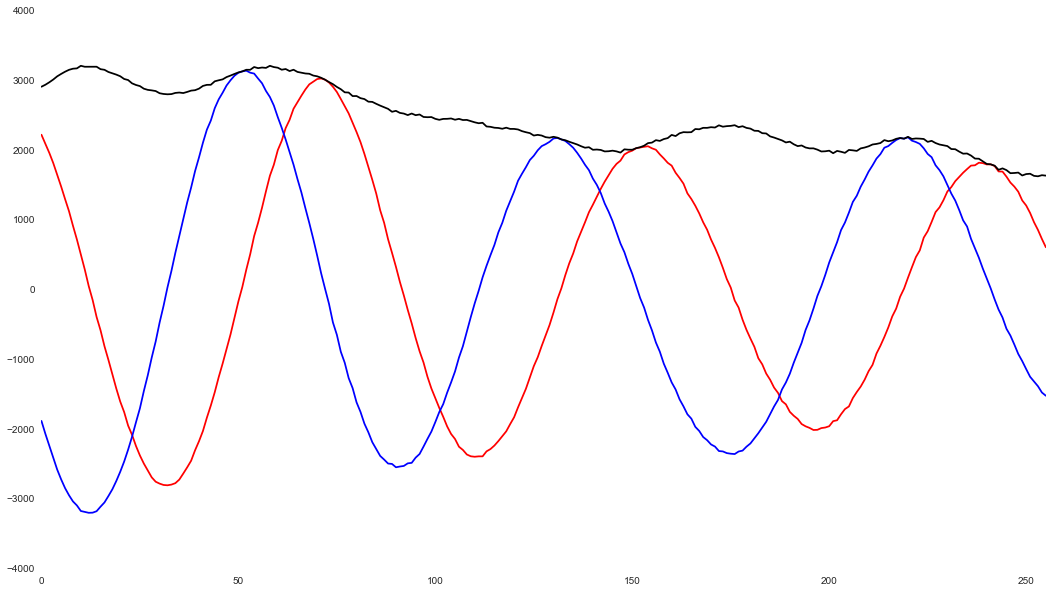

In [49]:
plt.figure(figsize=(18,10))
plt.plot(np.real(complex_data[:,6,14]),'r')
plt.plot(np.imag(complex_data[:,6,14]),'b')
plt.plot(np.abs(complex_data[:,6,14]),'k')
plt.xlim([0, 255])
plt.grid()
plt.show()

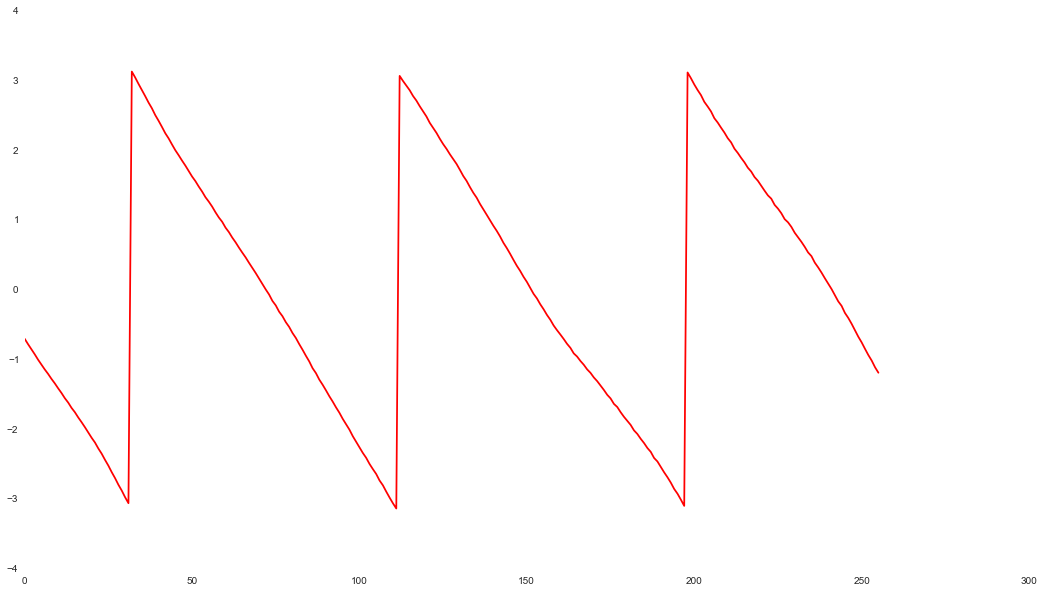

In [50]:
plt.figure(figsize=(18,10))
plt.plot(np.arctan2(np.imag(complex_data[:,6,14]), np.real(complex_data[:,6,14])),'r')
plt.grid()
plt.show()

In [51]:
w = spsig.chebwin(256,80)

In [52]:
d = 20 * np.log10(np.abs(np.array([np.fft.fftshift(np.fft.fft(w * complex_data[:, 6, k])) for k in range(42)], dtype = np.complex)))

In [53]:
kfp1 = pd.DataFrame(d, columns = [k for k in range(256)], index = [k for k in range(42)])

In [54]:
def buffer2data(buffer):
    data = np.array(buffer, dtype = np.float32)
    data.shape = (256,11,42,2)
    complex_data = data[:,:,:,0] + 1j*data[:,:,:,1]
    return complex_data

In [55]:
def datadec(buffer):
    data = buffer2data(buffer)
    return np.transpose(spsig.decimate(data.transpose(),8))

In [56]:
data1 = buffer2data(x.PO1.buffer)
data2 = buffer2data(x.PO2.buffer)
data3 = buffer2data(x.PO3.buffer)
data4 = buffer2data(x.PO4.buffer)
data5 = buffer2data(x.PO5.buffer)
data6 = buffer2data(x.PO6.buffer)
data7 = buffer2data(x.PO7.buffer)
data8 = buffer2data(x.PO8.buffer)
data9 = buffer2data(x.PO9.buffer)
data10 = buffer2data(x.PO10.buffer)
data11 = buffer2data(x.PO11.buffer)
data12 = buffer2data(x.PO12.buffer)
data13 = buffer2data(x.PO13.buffer)
data14 = buffer2data(x.PO14.buffer)
data15 = buffer2data(x.PO15.buffer)
data16 = buffer2data(x.PO16.buffer)

In [57]:
datas = [data1,
         data2,
         data3,
         data4,
         data5,
         data6,
         data7,
         data8,
         data9,
         data10,
         data11,
         data12,
         data13,
         data14,
         data15,
         data16]

In [58]:
data = np.concatenate((data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16))

In [59]:
data = np.transpose(spsig.decimate(data.transpose(),8))

In [60]:
w = spsig.chebwin(512, 80)

In [61]:
d = 20 * np.log10(np.abs(np.array([np.fft.fftshift(np.fft.fft(w * data[:, 6, k])) for k in range(42)], dtype = np.complex)))

In [62]:
kfp2 = pd.DataFrame(d, columns = [k for k in range(512)], index = [k for k in range(42)])

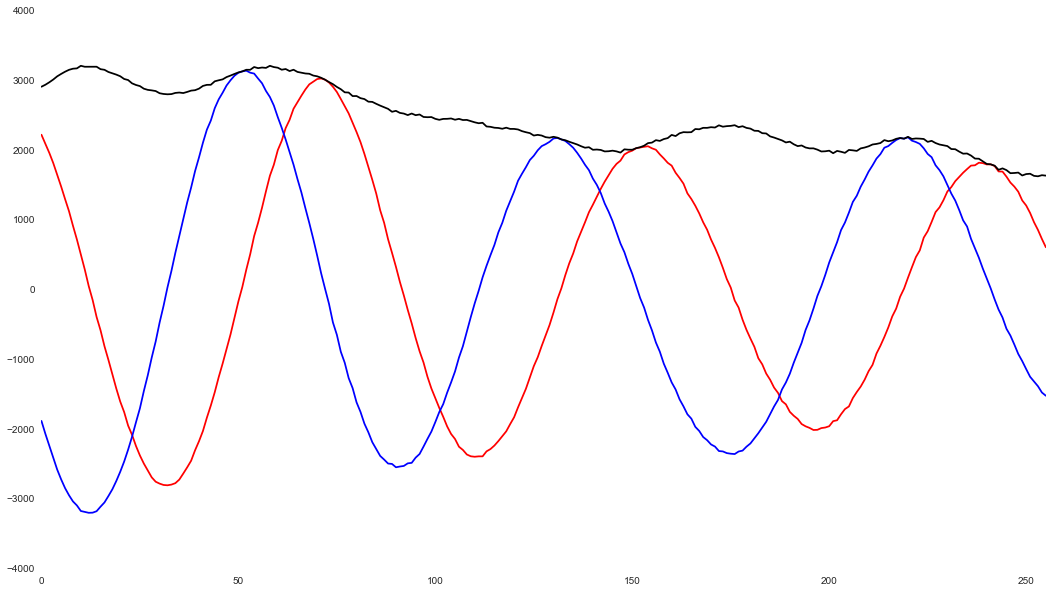

In [63]:
plt.figure(figsize=(18,10))
plt.plot(np.real(complex_data[:,6,14]),'r')
plt.plot(np.imag(complex_data[:,6,14]),'b')
plt.plot(np.abs(complex_data[:,6,14]),'k')
plt.xlim([0, 255])
plt.grid()
plt.show()

In [64]:
plt.cm.rainbow

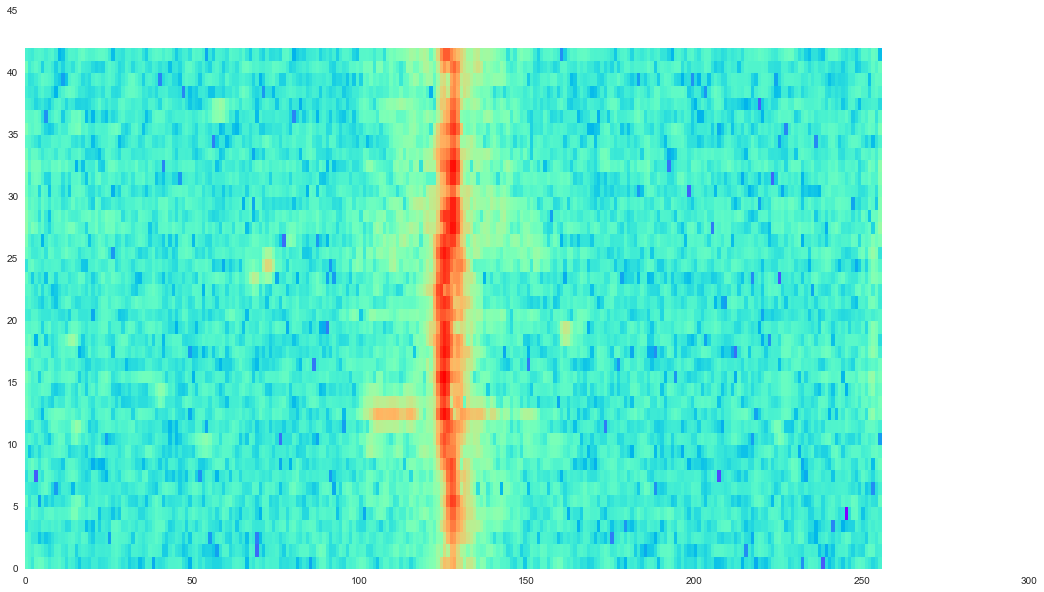

In [65]:
plt.figure(figsize=(18,10))
plt.pcolor(kfp1, cmap=plt.cm.rainbow)

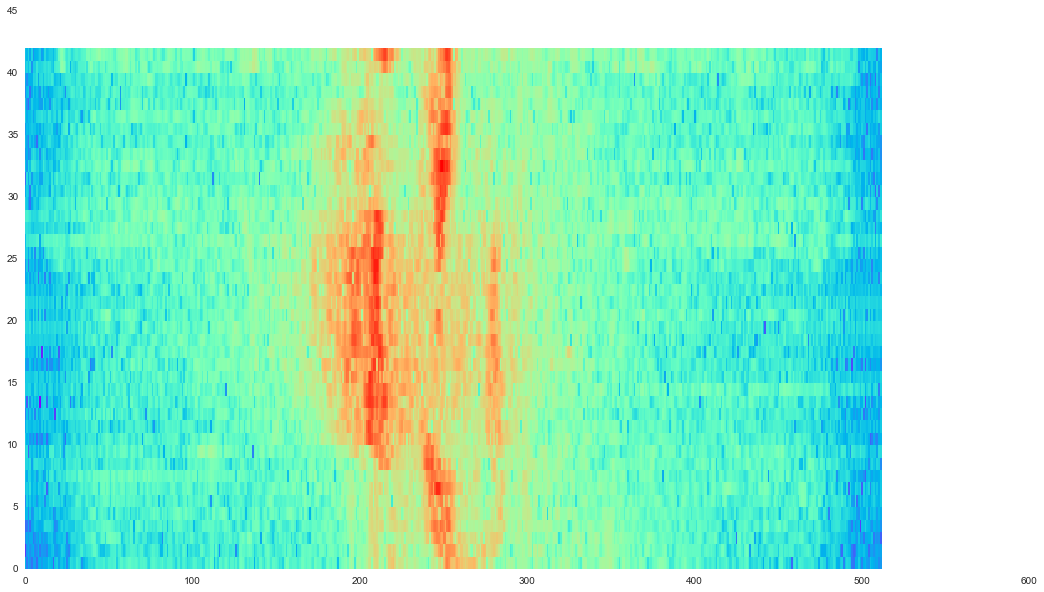

In [66]:
plt.figure(figsize=(18,10))
plt.pcolor(kfp2, cmap=plt.cm.rainbow)

In [67]:
def kfpplot(i=0):
    complex_data = datas[i]
    w = spsig.chebwin(256,80)
    d = 20 * np.log10(np.abs(np.array([np.fft.fftshift(np.fft.fft(w * complex_data[:, 6, k])) for k in range(42)], dtype = np.complex)))
    kfp1 = pd.DataFrame(d, columns = [k for k in range(256)], index = [k for k in range(42)])
    plt.figure(figsize=(16,10))
    plt.pcolor(kfp1, cmap=plt.cm.rainbow)
    plt.show()

In [68]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


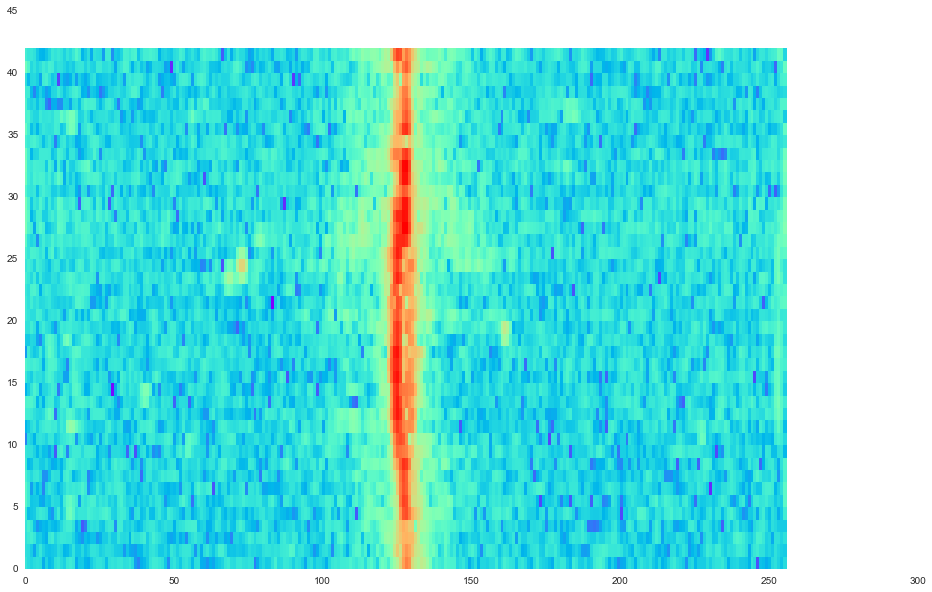

<function __main__.kfpplot>

In [69]:
interact(kfpplot, i=(0,15,1))

In [70]:
file = open('/mnt/d/Work/TempWork/2014.10.07 - 14.47.26.pp', 'rb')  
x = TKNk()

In [71]:
def read_kfp(i=0):  
    file.seek(52+i*946740, 0)
    file.readinto(x)
    data1 = buffer2data(x.PO.buffer)
    complex_data = data1
    w = spsig.chebwin(256,80)
    d = 20 * np.log10(np.abs(np.array([np.fft.fftshift(np.fft.fft(w * complex_data[:, 6, k])) for k in range(42)], dtype = np.complex)))
    kfp1 = pd.DataFrame(d, columns = [k for k in range(256)], index = [k for k in range(42)])
    plt.figure(figsize=(16,10))
    plt.pcolor(kfp1, cmap=plt.cm.rainbow)
    plt.xlim([0, 256])
    plt.ylim([0, 42])
    plt.show()  

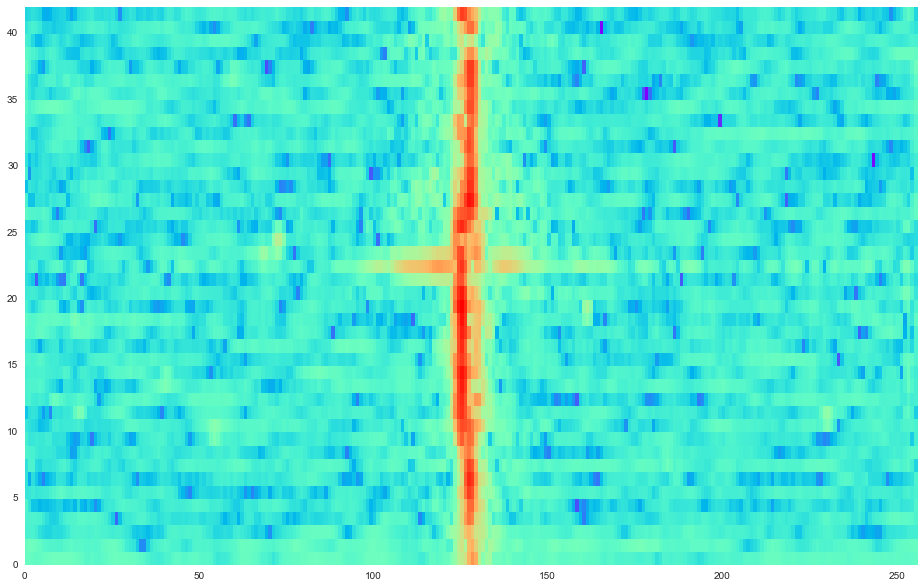

<function __main__.read_kfp>

In [72]:
interact(read_kfp, i=(0,1000,1))

In [73]:
file.close()

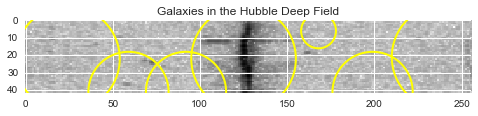

In [74]:
# Import matplotlib (plotting), skimage (image processing) and interact (user interfaces)
# This enables their use in the Notebook.
%matplotlib inline
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray

from IPython.html.widgets import interact, fixed

# Extract the first 500px square of the Hubble Deep Field.
image = kfp1
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use interact to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001));